In [2]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

from soul_gan.datasets.utils import get_dataset

In [3]:
dataset = get_dataset('cifar10')

Files already downloaded and verified


In [4]:
info = np.load(Path('../data/cifar10/kmeans.npz'))
centroids = (info['centroids'].reshape(-1, 3, 32, 32) + 1) / 2
closest_pts = (info['closest_pts'].reshape(-1, 3, 32, 32) + 1) / 2
sigmas = info['sigmas']

In [9]:
info['centroids'][0]

array([-0.05549632, -0.05392943, -0.04530736, ..., -0.27624956,
       -0.26615074, -0.25548017], dtype=float32)

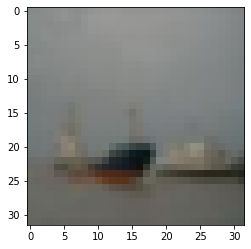

In [10]:
plt.imshow(closest_pts[0].transpose(1, 2, 0))

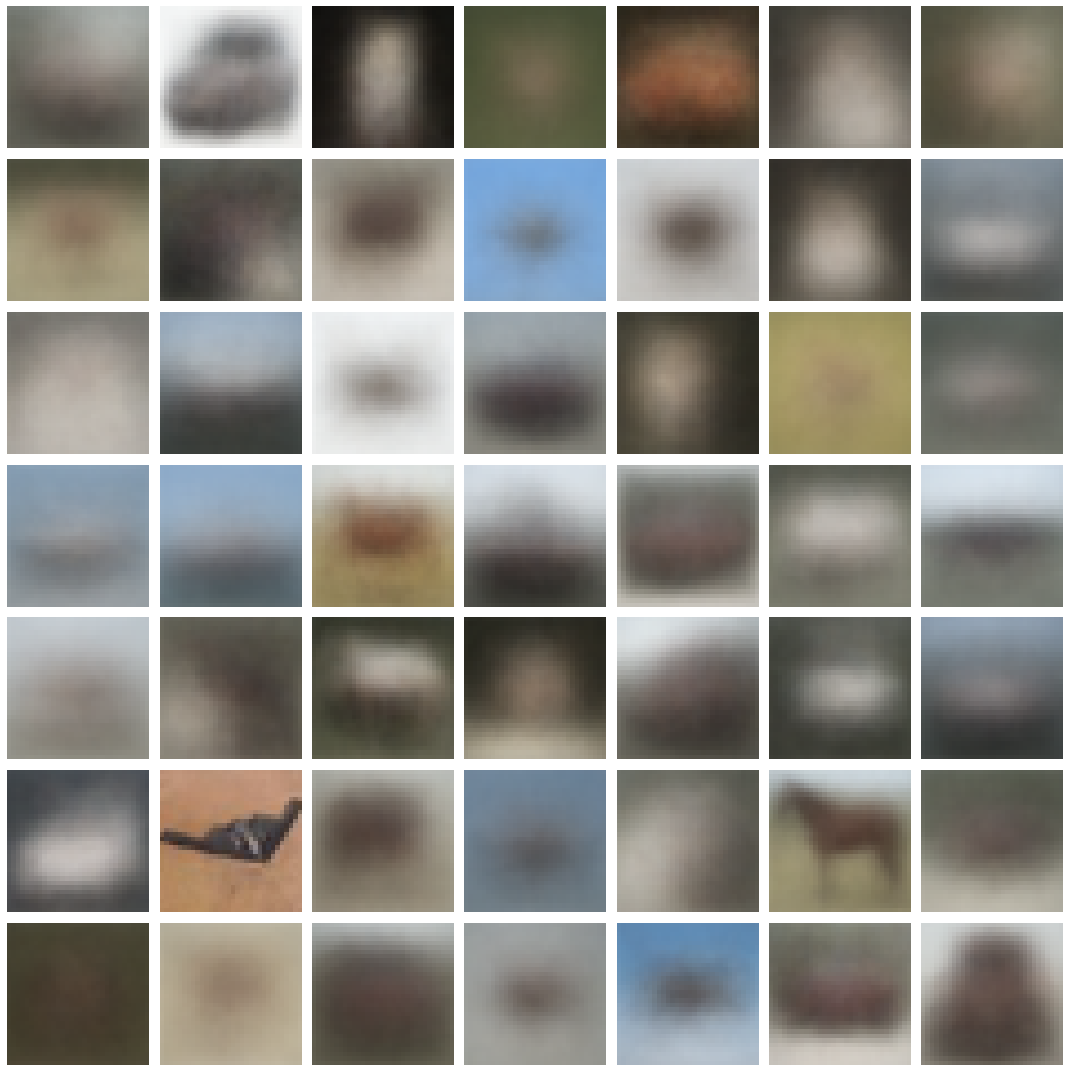

In [7]:
fig, axs = plt.subplots(7, 7, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(centroids[i].transpose(1, 2, 0))
    ax.axis('off')


fig.tight_layout()
plt.savefig('../dump/centroids.png')


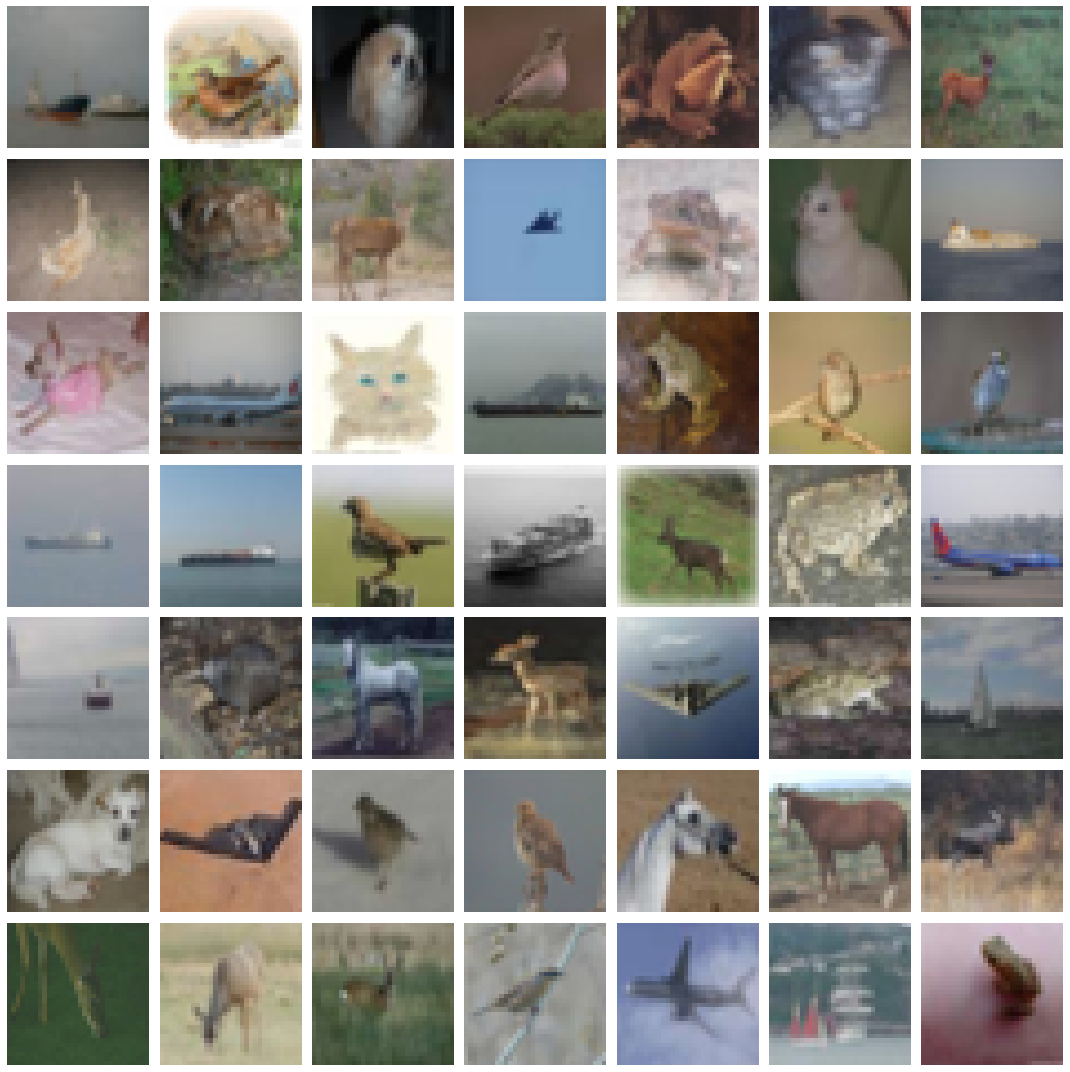

In [8]:
fig, axs = plt.subplots(7, 7, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(closest_pts[i].transpose(1, 2, 0))
    ax.axis('off')


fig.tight_layout()
plt.savefig('../dump/closest_pts.png')

In [15]:
id_pt = 23

n_clusters = len(centroids)

id = np.argmin(np.linalg.norm(closest_pts[id_pt].reshape(-1)[None, :] - centroids.reshape(n_clusters, -1)[None, ...], axis=-1))

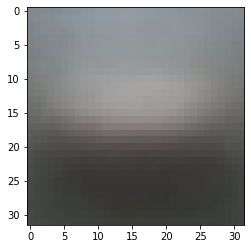

In [16]:
plt.imshow(centroids[id].transpose(1, 2, 0))

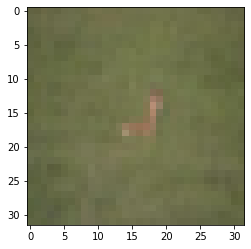

In [8]:
plt.imshow(closest_pts[1].transpose(1, 2, 0))

In [129]:
id, id_pt

(34, 19)

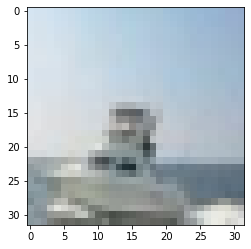

In [64]:
plt.imshow((dataset[100].permute(1,2,0)+1)/2)

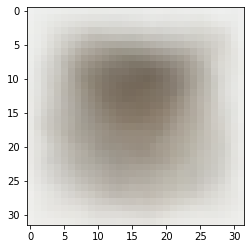

In [65]:
plt.imshow(centroids[7].transpose(1, 2, 0))

In [66]:
import torch

torch.sigmoid((dataset[675] - (centroids[7]-0.5)/0.5).reshape(-1).norm() - sigmas[7])

tensor(1.)